<a href="https://colab.research.google.com/github/duartegonzaloariel/UDELAR_FireBall/blob/main/UDELAR_FB_Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
!pip install tensorflow==2.9.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

# Librerias

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing import image


# Google Drive

In [ ]:
###############################################################################
###############################################################################
#                    Collab Initialization
###############################################################################
###############################################################################

# Determina si el script se ejecuta en Collab o en Jupyter Notebok
#______________________________________________________________________________
try:
    import google.colab
    from google.colab import drive
    drive.mount('/content/drive')
    COLLAB = True
    path_system = '/content/drive/My Drive/InvestigacionesPropias/'
except ImportError:
    COLLAB = False
    os.chdir(os.path.join(os.getcwd(), '../..'))
    path_system =  os.path.dirname(os.path.dirname(os.getcwd()))

print("Notebook is running in Google Colab:", COLLAB)
print('System Path:', path_system)

Mounted at /content/drive
Notebook is running in Google Colab: True
System Path: /content/drive/My Drive/InvestigacionesPropias/


# Path Configuration


In [ ]:
###############################################################################
###############################################################################
#                         PATH     CONFIGURACION                              #
###############################################################################
###############################################################################
# PATHS
DATABASE = 'Watec-ASI'
RESOLUTION = ''

filename_model = ''.join(['modelo_',DATABASE,RESOLUTION])
filename_prediction_csv = ''.join([DATABASE, '_modelo_',DATABASE, '_prediccion',RESOLUTION])
filename_prediction_bolidos_csv = ''.join([DATABASE, '_modelo_',DATABASE,
                                           '_prediccion_bolidos_entrenamiento_', DATABASE,RESOLUTION])

training = ''.join(['entrenamiento_', DATABASE])
test     = ''.join(['Test_', DATABASE])

path_base = os.path.join(path_system,'Fireball')
path_results = os.path.join(path_base, 'Resultados')

path_database       = os.path.join(path_results, training)
path_model          = os.path.join(path_database, f'{filename_model}.h5')
path_datatrain      = os.path.join(path_database, training)
path_dataprediction = os.path.join(path_database, test )

##  PREDICCIONES
path_predictions            = os.path.join(path_results, 'Predicciones')
path_prediction_csv         = os.path.join(path_predictions,
                                          f'{filename_prediction_csv}.csv')
path_prediction_bolidos_csv = os.path.join(path_predictions,
                                           f'{filename_prediction_bolidos_csv}.csv')
print('PATH Information:')
print('\t- Path System:         \t', path_system)
print('\t- Path Project:        \t', path_base)
print('\t- Path Results:        \t', path_results)
print('\t- Path Database:       \t', path_database)
print('\t- Path Model Filename: \t', path_model)
print('\t- Path Predictions:    \t', path_predictions)
print('\t- Path Prediction File:\t', path_prediction_csv)
print('\t- Path Bolidos Prediction File:\t', path_prediction_bolidos_csv)
print('\t- Path Prediction File:\t', path_prediction_csv)
print('\t- Path Prediction File:\t', path_dataprediction)

PATH Information:
	- Path System:         	 /content/drive/My Drive/InvestigacionesPropias/
	- Path Project:        	 /content/drive/My Drive/InvestigacionesPropias/Fireball
	- Path Results:        	 /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados
	- Path Database:       	 /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/entrenamiento_Watec-ASI
	- Path Model Filename: 	 /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/entrenamiento_Watec-ASI/modelo_Watec-ASI.h5
	- Path Predictions:    	 /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/Predicciones
	- Path Prediction File:	 /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/Predicciones/Watec-ASI_modelo_Watec-ASI_prediccion.csv
	- Path Bolidos Prediction File:	 /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/Predicciones/Watec-ASI_modelo_Watec-ASI_prediccion_bolidos_entrenamiento_Watec-ASI.csv
	- Path Prediction File:	 /content/dr

# Funciones

In [ ]:
#__________________________________________________________________________
#                           Rutas de las imágenes                         #
#__________________________________________________________________________

def load_image_paths(image_dir):
    file_paths = []
    target = []
    target_idx = 0
    for idx, (root, dir , files) in enumerate(sorted(os.walk(image_dir))):
        dir.sort()
        files.sort()
        if idx ==0:
            print('\nCLASSES:',dir)
        else:
            print('\n',idx,': target = ', target_idx, 'N Files = ', len(files),
                  '\n\t-->', root)
        if len(files)>0:
            for name in files:
                if name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    file_path = os.path.join(root, name)
                    file_paths.append(file_path)
                    target.append(target_idx)
                    #print(len(file_paths),':', file_path)
            target_idx += 1


    return file_paths, target

#__________________________________________________________________________
#                           Preprocesar una sola imagen                   #
#__________________________________________________________________________

def preprocess_image(file_path):
    img = image.load_img(file_path, target_size=image_size)
    img_array = image.img_to_array(img)
    #print(img_array.shape)
    return img_array

#__________________________________________________________________________
#                           Crear un dataset                              #
#__________________________________________________________________________

def create_dataset(file_paths, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(file_paths)
    dataset = dataset.map(lambda x: tf.numpy_function(preprocess_image, [x], tf.float32), num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)

    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Configuracion

In [ ]:
# Configuraciones
image_size = (480, 640)
BATCH_SIZE = 1
n_classes = 6
guardar_imagenes = True


# Operaciones

In [ ]:
#__________________________________________________________________________
#                           Carga del Modelo                              #
#__________________________________________________________________________
print('Loading Model..')
# Cargar el modelo previamente entrenado sin compilar
model = tf.keras.models.load_model(path_model, compile=False)
print('Model Loaded:', path_model)
# Compilar el modelo nuevamente con el optimizador correcto
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.trainable = False

Loading Model..
Model Loaded: /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/entrenamiento_Watec-ASI/modelo_Watec-ASI.h5


In [ ]:
#__________________________________________________________________________
#     EXAMINAR EL MODELO
#__________________________________________________________________________
model.summary()


# GENERAL MODEL
print('\nGLOBAL MODEL\n:')
for ix, layer in enumerate(model.layers):
    print(ix, ':',layer.name, ' --> ', layer.output.shape)

# RESNET 152
print('\nRESNET 152v2 MODEL\n:')
for ix, layer in enumerate(model.layers[1].layers):
    print(ix, ':',layer.name, ' --> ', layer.output.shape)

Model: "ResNet152V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 480, 640, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 15, 20, 2048)      58331648  
                                                                 
 avg_pool (GlobalAveragePool  (None, 2048)             0         
 ing2D)                                                          
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 first_dropout (Dropout)     (None, 2048)              0         
                                                                 
 first_dense (Dense)         (None, 256)               

In [ ]:
#__________________________________________________________________________
#                           Datos de Prediccion                           #
#__________________________________________________________________________

print('\nLoading Prediction Dataset...,','\n\t-->',path_dataprediction )
# Cargar las rutas de las imágenes
file_paths, target = load_image_paths(path_dataprediction)
print('\nFile Paths Loaded:\t', len(target), 'Files')
# Crear el dataset
dataset = create_dataset(file_paths, batch_size = BATCH_SIZE)
print('\nPrediction Dataset Build:', dataset.cardinality().numpy(), 'batches of', BATCH_SIZE, 'samples')



Loading Prediction Dataset..., 
	--> /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/entrenamiento_Watec-ASI/Test_Watec-ASI

CLASSES: ['1_nada', '2_reflejo_total', '3_lluvia', '4_animal', '5_avion', '6_Bolidos']

 1 : target =  0 N Files =  372 
	--> /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/entrenamiento_Watec-ASI/Test_Watec-ASI/1_nada

 2 : target =  1 N Files =  36 
	--> /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/entrenamiento_Watec-ASI/Test_Watec-ASI/2_reflejo_total

 3 : target =  2 N Files =  60 
	--> /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/entrenamiento_Watec-ASI/Test_Watec-ASI/3_lluvia

 4 : target =  3 N Files =  188 
	--> /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/entrenamiento_Watec-ASI/Test_Watec-ASI/4_animal

 5 : target =  4 N Files =  396 
	--> /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/entrenamiento_Watec-ASI/Test_Watec-ASI/5_av

In [ ]:
#__________________________________________________________________________
#                          Procesamiento de Imagenes                      #
#__________________________________________________________________________

# Realizar predicciones en lotes
data = []

print('\nProcessing Images...')
for batch_images in dataset:
    predictions = model.predict(batch_images)
    batch_size = batch_images.shape[0]
    start_idx = len(data)

    for idx in range(batch_size):
        print('.', end = '')
        img_path = file_paths[start_idx + idx]
        folder_name = os.path.dirname(img_path).split('/')[-1]  # Obtener el nombre de la carpeta
        file_name = os.path.basename(img_path)  # Obtener el nombre del archivo

        # Obtener los porcentajes para cada clase
        scores = 100 * predictions[idx]

        # Agregar los datos a la lista, cada clase será una columna en el DataFrame
        data.append([folder_name, file_name] + scores.tolist())
print('')


Processing Images...
1/1 [==============================] - 10s 10s/step
.....


In [ ]:
#__________________________________________________________________________
#                         Crea el Dataframe                               #
#__________________________________________________________________________

# Crear el DataFrame de Pandas con una columna por clase
columns = ['Carpeta', 'Nombre del Archivo'] + [f'Porcentaje de Clase {i+1}' for i in range(n_classes)]
df = pd.DataFrame(data, columns=columns)

# Mostrar el DataFrame resultante
print('\nDATAFRAME:\n---------------------------------------\n', df.info)

#__________________________________________________________________________
#                           Filtros                                       #
#__________________________________________________________________________

# Filtar por clase
filtrar_clase = 5  # Clase Bolidos  (clases = [0, 1, 2, 3, 4, 5])

# Determinar la clase predicha como la de mayor porcentaje
pred_class_columns = [
    'Porcentaje de Clase 1', 'Porcentaje de Clase 2', 'Porcentaje de Clase 3',
    'Porcentaje de Clase 4', 'Porcentaje de Clase 5', 'Porcentaje de Clase 6'
]

# Encontrar el índice del valor máximo en cada fila para las columnas de porcentaje
df['Clase Predicha'] = df[pred_class_columns].idxmax(axis=1)
# Modificar la columna 'Clase Predicha' para eliminar el prefijo "Porcentaje de "
df['Clase Predicha'] = df['Clase Predicha'].str.replace('Porcentaje de ', '')

# Añade el Target al dataframe
df['target'] = target

# Filtrar las filas donde 'Clase Predicha' sea "Clase 6"
df_clase = df[df['target'] == filtrar_clase]



# Reiniciar los índices
df_clase.reset_index(drop=True, inplace=True)

print('\nFINAL DATAFRAME:\n---------------------------------------\n', df.info)
print(df_clase)


DATAFRAME:
---------------------------------------
 <bound method DataFrame.info of         Carpeta                                 Nombre del Archivo  \
0        1_nada  12_24599_20_Station_12_2022-12-07-02-53-18orig...   
1        1_nada  12_24599_33_Station_12_2022-12-20-00-23-04orig...   
2        1_nada  12_24599_34_Station_12_2022-12-20-20-46-26orig...   
3        1_nada  12_24599_84_Station_12_2023-02-08-22-58-58orig...   
4        1_nada  14_24599_58_Station_14_2023-01-14-01-09-38orig...   
...         ...                                                ...   
1344  6_Bolidos          Station_8_2022-12-28-21-20-40original.jpg   
1345  6_Bolidos          Station_8_2023-08-31-23-32-31original.jpg   
1346  6_Bolidos          Station_9_2022-11-10-23-25-28original.jpg   
1347  6_Bolidos          Station_9_2023-04-21-04-45-36original.jpg   
1348  6_Bolidos          Station_9_2023-05-02-02-55-36original.jpg   

      Porcentaje de Clase 1  Porcentaje de Clase 2  Porcentaje de Clase 3 

# Resultados

In [ ]:
filtrar_clase = 5
# Filtrar las filas donde 'Clase Predicha' sea "Clase 6"
df_clase = df[df['target'] == filtrar_clase]
df_clase.reset_index(drop=True, inplace=True)
print(df_clase.info())
unique = df['target'].unique()
nunique = df['target'].nunique()
count = df['target'].value_counts()
print(unique, nunique, count)

# Reiniciar los índices
print(np.unique(df['target']))
print(np.unique(df_clase['target']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Carpeta                297 non-null    object 
 1   Nombre del Archivo     297 non-null    object 
 2   Porcentaje de Clase 1  297 non-null    float64
 3   Porcentaje de Clase 2  297 non-null    float64
 4   Porcentaje de Clase 3  297 non-null    float64
 5   Porcentaje de Clase 4  297 non-null    float64
 6   Porcentaje de Clase 5  297 non-null    float64
 7   Porcentaje de Clase 6  297 non-null    float64
 8   Clase Predicha         297 non-null    object 
 9   target                 297 non-null    int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 23.3+ KB
None
[0 1 2 3 4 5] 6 target
4    396
0    372
5    297
3    188
2     60
1     36
Name: count, dtype: int64
[0 1 2 3 4 5]
[5]


In [ ]:
# Solicitar al usuario que elija entre df1 y df2
eleccion = input("Elija el DataFrame a guardar prediccion completa (1) o solo bolidos (2): ")

# Asignar el DataFrame según la elección del usuario
if eleccion == '1':
    df1 = df
    csv_file_path = path_prediction_csv
elif eleccion == '2':
    df1 = df_clase
    csv_file_path = path_prediction_bolidos_csv
else:
    raise ValueError("Elección no válida. Debe ser 'df1' o 'df2'.")

print(df1.info())

# Guardar el DataFrame como un archivo CSV
df1.to_csv(csv_file_path, index=False)

# Verificar si el archivo existe
if os.path.exists(csv_file_path):
    print(f"Archivo guardado correctamente en {csv_file_path}")
else:
    print(f"Error al guardar el archivo en {csv_file_path}")

# Leer el archivo guardado y comparar con el DataFrame original
df_saved = pd.read_csv(csv_file_path)
if df1.equals(df_saved):
    print("El contenido del archivo guardado coincide con el DataFrame original.")
else:
    print("El contenido del archivo guardado no coincide con el DataFrame original.")

Elija el DataFrame a guardar prediccion completa (1) o solo bolidos (2): 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Carpeta                297 non-null    object 
 1   Nombre del Archivo     297 non-null    object 
 2   Porcentaje de Clase 1  297 non-null    float64
 3   Porcentaje de Clase 2  297 non-null    float64
 4   Porcentaje de Clase 3  297 non-null    float64
 5   Porcentaje de Clase 4  297 non-null    float64
 6   Porcentaje de Clase 5  297 non-null    float64
 7   Porcentaje de Clase 6  297 non-null    float64
 8   Clase Predicha         297 non-null    object 
 9   target                 297 non-null    int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 23.3+ KB
None
Archivo guardado correctamente en /content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/Predicciones/Watec-ASI_mode

# EXTRACCIÓN DE PCA FEATURES

# GRAD-CAM

(1, 480, 640, 3)
./content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/Predicciones/Watec-ASI/0_activation_0.npy
(1, 15, 20)


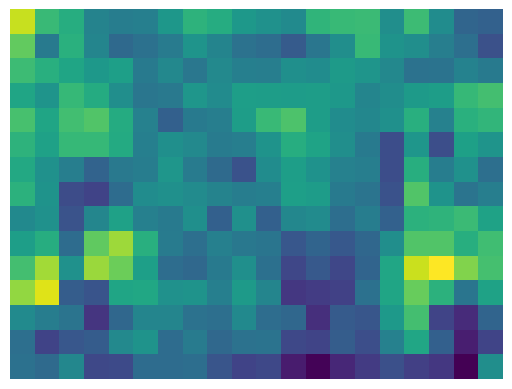

(1, 480, 640, 3)
./content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/Predicciones/Watec-ASI/0_activation_1.npy
(1, 15, 20)


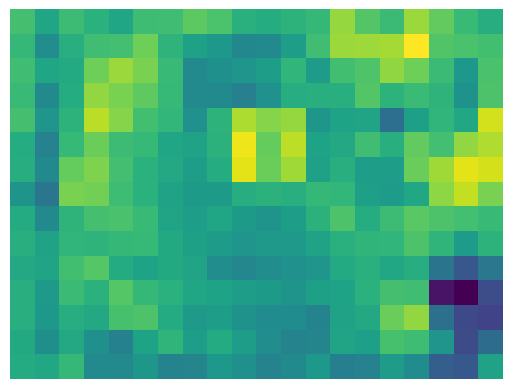

(1, 480, 640, 3)
./content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/Predicciones/Watec-ASI/0_activation_2.npy
(1, 15, 20)


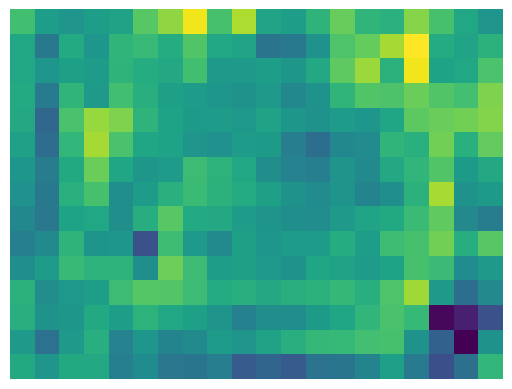

(1, 480, 640, 3)
./content/drive/My Drive/InvestigacionesPropias/Fireball/Resultados/Predicciones/Watec-ASI/0_activation_3.npy
(1, 15, 20)


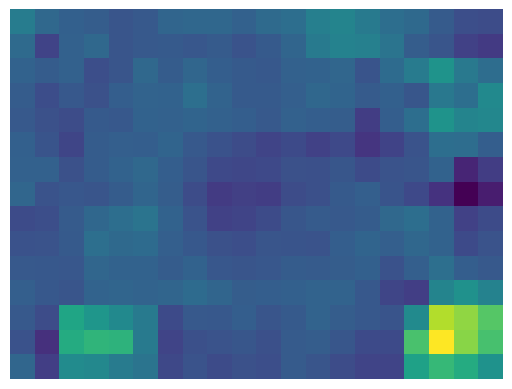

(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 640, 3)
.(1, 480, 6

In [ ]:
model.trainable = False
conv_layer_name = "conv5_block3_out"
conv_layer_output = model.layers[1].get_layer(conv_layer_name).output

grad_model = tf.keras.models.Model([model.layers[1].inputs], [conv_layer_output])

input_tensor = tf.keras.layers.Input(shape=( 15,20,2048))

#class_model = tf.keras.models.Model(inputs=input_tensor, outputs = x)

path_activation = os.path.join(path_predictions, DATABASE)
if not os.path.exists(path_activation):
    os.makedirs(path_activation)
    print('Creating path:', path_activation)

index = 0
for idb, (path, targ) in enumerate(zip(file_paths, target)):
    data = np.expand_dims(preprocess_image(path), axis=0)
    print(data.shape)

    with tf.GradientTape() as tape:
        conv_output  = grad_model(data)
        tape.watch(conv_output)

    activation = np.mean(conv_output, axis = 3)


    filename = ''.join([str(targ), '_activation_', str(index), '.npy'])
    index +=1
    path_activa_file = os.path.join(path_activation, filename)

    #activa = (activa - np.min(activa))/(np.max(activa) - np.min(activa))
    #activa = np.uint8(255 * activa)
    np.save( path_activa_file, activation[0])
    print('.', end='')
    if idb < 4:
        print(path_activa_file)
        print(activation.shape)
        plt.imshow(activation[0])
        plt.axis('off')
        plt.show()


